# ADIDAS US Sales Datasets

## 1.- DESCRIPCION GENERAL DEL PROYECTO:

- Titulo: ADIDAS US Sales Datasets
  
- Objetivo: analizar las ventas minoristas en el particular mercado US, para marca Adidas.
  
- Conjunto de datos: Utilizando el datasets, el cuaderno de análisis explora varios aspectos fundamentales del negocio, incluido las tendencias de ventas, la popularidad del producto, el desempeño del mercado regional y más.

- Miembros del equipo: el responsable de este cuaderno es fvaldepe, quien se ha encargado de la limpieza, modelado, visualización y análisis de los resultados a partir del trabajo realizado de seguimiento realizado en https://github.com/prayagpadwal/Adidas-Sales-Analysis.

## 2.- DESCRIPCION GENERAL DE DATOS DE PARTIDA:

- Fuente de datos: para este proyecto, utilizamos el "Conjunto de datos de ventas de Adidas" de data.world ( https://data.world/stellabigail/adidas-us-sales-datasets ), en formato XLSX

- Tamaño de datos: el conjunto se compone de 9.648 registros con 13 variables, con un tamaño de 683 KB

- Breve descripción de los datos: inicialmente no hay campos con valores nulos ni vacios, la variable con formato fecha es correcto, comprendida entre año 2020 - 2021, y las variables de tipo numérico se encuentran establecido correctamente.
  
- SHARED WITH 
Everyon
- CREATED: 
2 year  ag 
 
- SIZE: 
682.28 K
- LICENSE: 
Public Domainoady e

| Column Name       |  Type   | Description                                                                          | Column number |
| ----------------- | ------- | ------------------------------------------------------------------------------------ | --------------|
| retailer          | string  | vendedor                                                                             |      1        |
| retailer_id       | integer | id_vendedor                                                                          |      2        |
| invoice_date      | date    | fecha factura                                                                        |      3        |
| region            | string  | Geographic areas like West, Northeast, Southeast, South, and Mid-west                |      4        |
| state             | string  | estado                                                                               |      5        |
| city              | string  | ciudad                                                                               |      6        |
| product           | string  | Categories like Men’s and Women’s Street and Athletic Footwear, and Apparel.         |      7        |
| Price per Unit    | decimal | The cost of a single item of a specific product.                                     |      8        |
| Units Sold        | integer | The quantity of a product sold in a specific timeframe.                              |      9        |
| Total Sales       | decimal | The total revenue from sales over a certain period.                                  |      10       |
| Operating Profit  | decimal | A measure of the profitability from the main business operations.                    |      11       |
| Operating Margin  | decimal | A ratio indicating the profitability of the business operations.                     |      12       |
| Sales Method      | string  | The channels through which sales were made, including In-store, Outlet, and Online.  |      13       |

## 3.- ANÁLISIS EXPLORATORIO DE LOS DATOS:

### 3-1) Importando los datos

Seguiremos los pasos fundamentales establecidos en las guias completas para realizar un análisis exploratorio de datos (EDA). Comenzaremos importando en nuestro Notebook los módulos (librerias) necesarios para cargar, explorar y manipular los datos contenidos en el archivo. Importaremos los datos del directorio donde se encuentren almacenados. En en el archivos nos encontramos con diferentes tipos de variables: de tipo texto, numérico entero, numérico flotante, de fecha, en las del tipo texto debemos verificar el encoding.

In [1]:
# Importamos los modulos que nos serán necesarios para cargar, manipular los datos

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [2]:
# Hacemos una lectura del archivo del datasets, mediante el médoto read_excel de Pandas, y lo convertimos en DataFrame con data

data = pd.read_excel('C:/Users/fvald/Documents/Varias Hojas de Cálculo/Adidas_US_Sales_Datasets.xlsx')

In [3]:
# previsualizamos las primeras filas con el método head()

data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
# previsualizamos las ultimas filas del DF con el método tail()

data.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet
9647,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Women's Street Footwear,29.0,83,2407.0,649.89,0.27,Outlet


### 3-2) Limpieza de Datos

Una vez que hemos cargado los datos y hemos verificado su integridad, pasamos a la limpieza. Ahora revisaremos el formato de los datos, los tipos de datos que tenemos, los valores nulos y haremos un comentario sobre los valores duplicados.

### 3-2.1) Tipos de datos

Ahora nos interesa familiarizarnos con los tipos de datos de nuestro dataset. Esto sucede por dos motivos, el primero es que nos interesa saber si estamos tratando con texto, valores numéricos, categóricos, números enteros, decimales, y sus medidas estadísticas centrales y de dispersión. Básicamente queremos un resumen matemático de alto nivel sobre los principales estadísticas de nuestro dataset.

Si utilizamos el método .dtypes sobre el DataFrame veremos que hay variables con tipo de datos numéricos, de enteros (int) y decimales (float64), de tipo texto, Pandas llama al tipo string como object y una variable tipo fecha.

In [5]:
data.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

Cuando verificamos el tipo de datos, también suele ser útil verificar el tamaño del Dataset. El dataset es una tabla, por lo que tiene una cantidad de registros igual a la cantidad de filas y una cantidad de variables igual a la cantidad de columnas. El atributo .shape del DataFrame nos permite saber el tamaño del DataFrame. Lo devuelve como una tupla de la forma: ("número de filas", "número de columnas")

In [6]:
data.shape

(9648, 13)

### 3-2.2) Detección y tratamiento de valores atípicos 

Obtenemos los valores unicos que hay en las variables cuyo tipo de valor es string, que se dan en las columnas Retailer, Region, State, City, Product, Sales Method

In [7]:
# obtenemos los valores unicos que hay en las variables cuyo tipo de valor es string, que se dan en las columnas Retailer, Region,State, City, Product, Sales Method

data['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [8]:
data['Region'].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [9]:
data['State'].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

In [10]:
data['City'].unique()

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando',
       'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis',
       'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque',
       'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville',
       'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita',
       'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis',
       'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence',
       'Boston', 'Burlington', 'Manchester'], dtype=object)

In [11]:
data['Product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [12]:
data['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

### 3-2.3) Valores nulos

Ahora queremos ver si el dataset tiene valores nulos y qué hacer con ellos en caso de que los tenga. Vemos que este dataset no tiene valores nulos con los métodos que se muestran a continuación

In [13]:
# 1er Método: One way of checking nulls: the .info() method

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [14]:
# 2º Método: Another way: using the isna() method

for column in data.columns:
    num_nulls = data[column].isna().sum()
    print(f'Column "{column}" has {num_nulls} nulls')

Column "Retailer" has 0 nulls
Column "Retailer ID" has 0 nulls
Column "Invoice Date" has 0 nulls
Column "Region" has 0 nulls
Column "State" has 0 nulls
Column "City" has 0 nulls
Column "Product" has 0 nulls
Column "Price per Unit" has 0 nulls
Column "Units Sold" has 0 nulls
Column "Total Sales" has 0 nulls
Column "Operating Profit" has 0 nulls
Column "Operating Margin" has 0 nulls
Column "Sales Method" has 0 nulls


### 3-2.4) Valores duplicados

En este caso, los valores duplicados no nos interesan por dos razones. La primera es porque sabemos que el dataset no contiene valores duplicados que no deban tenerse en cuenta para el análisis. Esto en la práctica no lo sabríamos, pero como es un dataset clásico esta información es conocida. La segunda es que si miramos el tamaño de nuestro dataset, tenemos solamente 9648 registros, por lo que si eliminamos duplicados corremos el riesgo de no poder realizar un análisis suficiente de los datos.

Igualmente, como algunos se preguntarán cómo podríamos atacar esta parte del EDA, lo mostraremos debajo a pesar de que no se realizarán cambios reales sobre el DataFrame.

Primero buscaremos los valores repetidos en el dataframe. Esto podemos hacerlo con el método .duplicated(). Este método devuelve una serie de True/False que tiene True en la posición donde hay un duplicado y False en la posición donde no la hay. Si le pasamos eso al DataFrame original, es como si estuvieramos filtrando por los valores que están duplicados.

Una observación es que el método duplicated por defecto borra el primer elemento repetido, pero como nos interesa ver todos los elementos, le pasamos el argumento "keep" como False, lo que significa que queremos ver todos los valores repetidos.

In [15]:
data[data.duplicated(keep=False)]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method


Se comprueba que el dataset no contiene registros de valores Duplicdos

### 3-2.5) Valores conversion

Para convertir datos a formato numérico, a menudo es necesario eliminar caracteres no numéricos, como símbolos de moneda o comas. En ocasiones, las columnas que se espera que contengan datos numéricos pueden incluir caracteres no numéricos. Las variables que se sometieron a este proceso de limpieza incluyen Units Sold, Total Sales, Operating Profit, and Operating Margin 

In [16]:
data['Units Sold'] = data['Units Sold'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data['Total Sales'] = data['Total Sales'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data['Operating Profit'] = data['Operating Profit'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data['Operating Margin'] = data['Operating Margin'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)

### 3-2.5.1) Conversión de fecha de factura en objeto DateTime:

La conversión de fecha de factura en un objeto DateTime permite un manejo preciso de datos temporales, esencial para cálculos precisos basados ​​en fechas y análisis de lineas de tiempo.

In [17]:
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

Tras las conversiones realizadas anteriormente en las diferentes variables, visualizamos de nuevo los tipos de variables para ver como han quedado

In [18]:
data.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                 float64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

## 3-3) Analisis Variables

Una vez que hemos terminado el proceso de limpieza, pasamos al análisis visual de los datos. Realizaremos análisis univariante y multivariante, para que puedan ver cómo hacerlo y cómo utilizar Seaborn a nuestro favor para hacerlo. En la sección final del notebook utilizaremos PCA (un método de reducción de dimensionalidad) para intentar visualizar todo el dataset en una sola gráfica.

### 3-3.1) Análisis univariante

El análisis univariante se centra en una única variable a la vez. No nos interesa ver el comportamiento de la variable en relación a las demás, sino en relación a si misma. Cómo es su distribución? Es una categoría o una variable continua? Hay alguna variable que nos llame la atención? Todo esto es lo que queremos responder en este análisis.

C:\Users\fvald\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total Sales', ylabel='Count'>

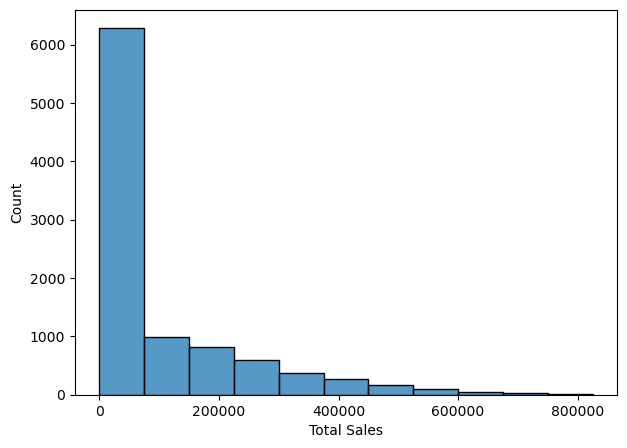

In [19]:
# Analizamos la variable mas importante del Datasets, total ventas. Dibujamos un histograma con Seaborn

plt.figure(figsize=(7, 5))
sns.histplot(data=data, x='Total Sales', bins=11)

Se observa que la variable de Total Sales no sigue una distribucion normal, la mayoria de las ventas estan por debajo de los 100.000

### 3-3.2) Análisis BIvariante

El análisis BIvariante se centra en el comportamiento de una variable respecto a otra. Si el estudio toma como objeto, el análisis de las ventas, lo correcto es analizar como se comporta las ventas, respecto a las otras variables de las que depedne: Retailer (vendedor), Region, Estado, Ciudad, Producto y fechas de ventas para comprobar la estacionalidad de las mismas.

## 4.- VISUALIZACION

### Análisis comerciales que se pueden resolver utilizando este conjunto de datos:

1. Análisis del rendimiento de las ventas: ¿Qué productos destacan en ventas y cuáles tienen un rendimiento inferior?

2. Análisis del mercado regional: ¿Qué tiendas están experimentando fuertes ventas y cuáles están rezagadas?

3. Análisis del margen de beneficio: ¿El margen de beneficio tiene un impacto significativo en las ventas?

4. Eficiencia de los métodos de venta: ¿Qué método de venta es más efectivo: en la tienda o en línea?

5. Optimización de precios: ¿Existe algún rango de precios específico que consiga mejores ventas que otros?

6. Optimización del Portafolio de Productos I: Determinar qué productos son más rentables, segmentados por ubicación.

7. Oportunidades de expansión del mercado: evaluar las tiendas con mejor y peor desempeño según su ubicación.

8. Análisis de series temporales: investigue si ha habido una tendencia de ventas constante a lo largo del tiempo o alguna tendencia mensual notable.

9. Análisis predictivo de ventas: desarrolle un pronóstico de ventas mensuales.

10. Panel de ventas de Power BI

####  1. Análisis del rendimiento de las ventas: ¿ Qué productos destacan en ventas y cuáles tienen un rendimiento inferior?

Análisis de ventas:

Ingresos totales: los ingresos totales se refieren a la cantidad total de ingresos generados por una empresa por sus ventas de bienes o servicios, antes de deducir cualquier gasto. Es un indicador principal de la salud financiera y el desempeño del mercado de una empresa, que se calcula multiplicando el precio de los bienes o servicios por el número total de unidades vendidas. En nuestro caso como ya tenemos el dato de una columna del total ventas, solamente hacemos el sumatorio de toda los registros de la columna

In [20]:
# Primero averiguemos los ingresos totales

total_revenue = data['Total Sales'].sum()
total_revenue

899902125.0

In [21]:
# Calculamos las ventas Total Sales y Units Sold por cada tipo de Producto

product_sales = data.groupby('Product').agg({'Total Sales': 'sum', 'Units Sold': 'sum'})
product_sales

,Total Sales,Units Sold
Product,,
Men's Apparel,123728632.0,306683.0
Men's Athletic Footwear,153673680.0,435526.0
Men's Street Footwear,208826244.0,593320.0
Women's Apparel,179038860.0,433827.0
Women's Athletic Footwear,106631896.0,317236.0
Women's Street Footwear,128002813.0,392269.0


In [22]:
# Ordenamos de forma descendente los Productos por Total Sales y los identificamos como top_performing_products

top_performing_products = product_sales.sort_values(by='Total Sales', ascending=False).head()

# Visualizamos los resultados
print('Top-performing-products: ')
top_performing_products

Top-performing-products: 


,Total Sales,Units Sold
Product,,
Men's Street Footwear,208826244.0,593320.0
Women's Apparel,179038860.0,433827.0
Men's Athletic Footwear,153673680.0,435526.0
Women's Street Footwear,128002813.0,392269.0
Men's Apparel,123728632.0,306683.0


C:\Users\fvald\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fvald\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


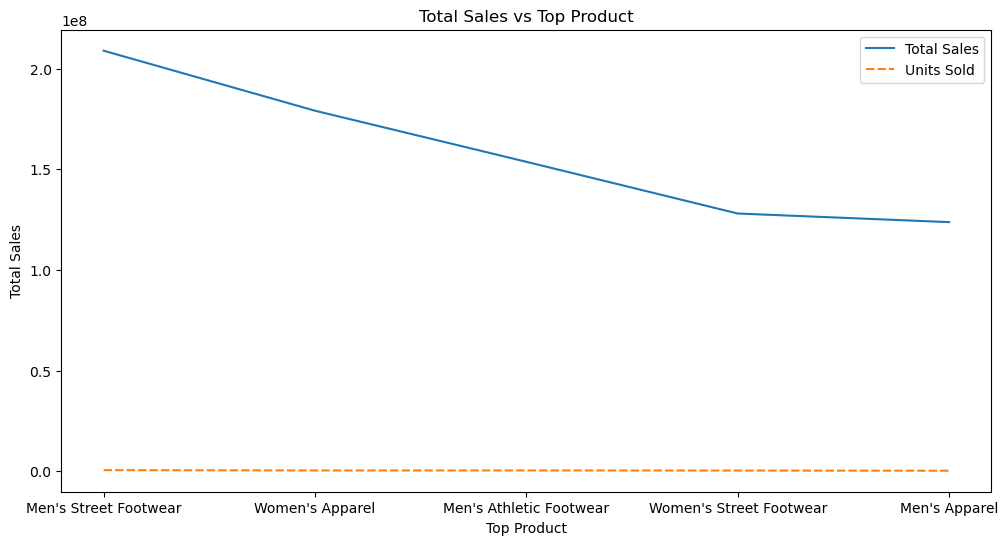

In [23]:
# Dibujamos los productos mas importantes del Datasets. Dibujamos un histograma con Seaborn

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_performing_products)
plt.title("Total Sales vs Top Product")
plt.xlabel("Top Product")
plt.ylabel("Total Sales")
plt.show()

El producto Men's Street Footwear, destaca en ventas y ocupa el nº 1

In [24]:
# Ordenamos de forma descendente los Productos por Total Sales y los identificamos como top_performing_products

under_performing_products = product_sales.sort_values(by='Total Sales', ascending=True).head()

# Visualizamos los resultados
print('under-performing-products: ')
under_performing_products

under-performing-products: 


,Total Sales,Units Sold
Product,,
Women's Athletic Footwear,106631896.0,317236.0
Men's Apparel,123728632.0,306683.0
Women's Street Footwear,128002813.0,392269.0
Men's Athletic Footwear,153673680.0,435526.0
Women's Apparel,179038860.0,433827.0


EL producto Womnen's Athletic Footwear es en que tiene unas ventas menores

C:\Users\fvald\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

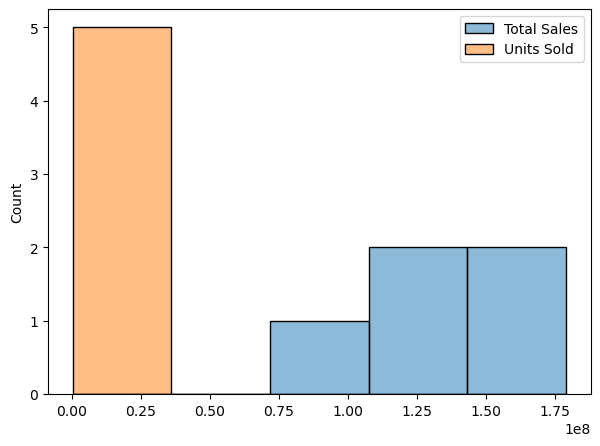

In [25]:
# Dibujamos los productos mas importantes del Datasets. Dibujamos un histograma con Seaborn

plt.figure(figsize=(7, 5))
sns.histplot(data=under_performing_products)

Analisis principal de los datos obtenidos:

El calzado urbano para hombres emerge como la categoría de mejor desempeño con sólidas ventas que ascienden a 208.826.244.-, lo que destaca una fuerte preferencia del mercado. En cambio, el calzado deportivo femenino muestra un desempeño relativamente menor, registrando ventas por $106.631.896.

Esta disparidad sugiere áreas potenciales de crecimiento e indica la necesidad de estrategias específicas para mejorar el atractivo de categorías de bajo rendimiento como el calzado deportivo femenino.

#### 2. Análisis del mercado regional : ¿Qué tiendas están experimentando fuertes ventas y cuáles están descendiendo?

- Comencé agrupando los datos según dos variables clave: ciudad (City) y minorista (Retailer). Esta agrupación permite examinar las cifras de ventas de minoristas específicos dentro de cada ciudad.
- Después de agrupar, se aplica el método `.sum()` para calcular el total de unidades vendidas por cada minorista en cada ciudad.
- Finalmente, los datos agrupados se ordenan para mayor claridad: están ordenados en orden ascendente por ciudad, lo que garantiza que los datos se presenten de manera sistemática, ciudad por ciudad, y en orden descendente por unidades vendidas, destacando a los minoristas con mayores ventas. en la parte superior de la lista de cada ciudad.

In [26]:
# Primero averigue cuantas ciudades hay y cuantas tiendas en cada ciudad

unique_cities = data['City'].unique
print(f'Unique cities:', unique_cities)

Unique cities: <bound method Series.unique of 0         New York
1         New York
2         New York
3         New York
4         New York
           ...    
9643    Manchester
9644    Manchester
9645    Manchester
9646    Manchester
9647    Manchester
Name: City, Length: 9648, dtype: object>


In [27]:
# Se cuenta el numero de ciudades unicas

num_unique_cities = data['City'].nunique()
print(f'Number of unique cities:', num_unique_cities)

Number of unique cities: 52


In [28]:
# Agrupamos por City y Retailer y sumamos las Units Sold

three_columns_grouped = data.groupby(['City', 'Retailer'])['Units Sold'].sum().reset_index()
print(three_columns_grouped)

            City       Retailer  Units Sold
0         Albany         Kohl's     10053.0
1         Albany      West Gear     47133.0
2    Albuquerque         Kohl's     43752.0
3    Albuquerque  Sports Direct      8881.0
4      Anchorage         Amazon     26749.0
..           ...            ...         ...
103    St. Louis      West Gear      7527.0
104      Wichita    Foot Locker      8940.0
105      Wichita         Kohl's     20523.0
106   Wilmington    Foot Locker     20924.0
107   Wilmington         Kohl's      9351.0

[108 rows x 3 columns]


In [29]:
# Ordenamos los resultados por ciudad para encontrar el Top y el peor performing retailer

three_columns_sorted = three_columns_grouped.sort_values(by=['City', 'Units Sold'], ascending=[True, False])
print(three_columns_sorted)

            City       Retailer  Units Sold
1         Albany      West Gear     47133.0
0         Albany         Kohl's     10053.0
2    Albuquerque         Kohl's     43752.0
3    Albuquerque  Sports Direct      8881.0
4      Anchorage         Amazon     26749.0
..           ...            ...         ...
103    St. Louis      West Gear      7527.0
105      Wichita         Kohl's     20523.0
104      Wichita    Foot Locker      8940.0
106   Wilmington    Foot Locker     20924.0
107   Wilmington         Kohl's      9351.0

[108 rows x 3 columns]


In [30]:
# Obtenemos el TOP performing ratailer en cada ciudad

top_performers = three_columns_sorted.groupby('City').head(1)
print(top_performers)

               City       Retailer  Units Sold
1            Albany      West Gear     47133.0
2       Albuquerque         Kohl's     43752.0
4         Anchorage         Amazon     26749.0
7           Atlanta  Sports Direct     41414.0
8         Baltimore    Foot Locker      9322.0
11         Billings         Kohl's     39656.0
14       Birmingham  Sports Direct     61653.0
17            Boise      West Gear     23539.0
19           Boston  Sports Direct     21132.0
20       Burlington         Amazon     36476.0
22       Charleston    Foot Locker     68381.0
26        Charlotte  Sports Direct     52586.0
28         Cheyenne         Kohl's     43701.0
29          Chicago    Foot Locker     22212.0
31         Columbus         Amazon     44925.0
34           Dallas  Sports Direct     67683.0
35           Denver      West Gear     41378.0
36       Des Moines    Foot Locker     15788.0
39          Detroit  Sports Direct     42169.0
41            Fargo  Sports Direct     15462.0
43         Ha

In [31]:
# Visualizamos los resultados

print('TOP performing Retailers in each City: ')
top_performers.head()

TOP performing Retailers in each City: 


,City,Retailer,Units Sold
1,Albany,West Gear,47133.0
2,Albuquerque,Kohl's,43752.0
4,Anchorage,Amazon,26749.0
7,Atlanta,Sports Direct,41414.0
8,Baltimore,Foot Locker,9322.0


In [32]:
# Obtenemos el Peor performing ratailer en cada ciudad

top_performers = three_columns_sorted.groupby('City').tail(1)
top_performers.tail()

,City,Retailer,Units Sold
98,Seattle,Foot Locker,4349.0
101,Sioux Falls,Sports Direct,7557.0
103,St. Louis,West Gear,7527.0
104,Wichita,Foot Locker,8940.0
107,Wilmington,Kohl's,9351.0


Análisis principal de los datos obtenidos:

West Gear en Albany y Kohl's en Albuquerque emergen como los de mejor desempeño en sus respectivas ciudades, con West Gear vendiendo 47,133 unidades y Kohl's vendiendo 43,752 unidades .

Por el contrario, los de peor desempeño son Foot Locker en Seattle y Sports Direct en Siuox Falls, con ventas de 4.349 y 7.557 unidades respectivamente.

#### 3. Análisis del margen de beneficio: ¿El beneficio operativo afecta significativamente las ventas?

Para responder a la pregunta, podemos utilizar tablas y gráficos detallados para un análisis en profundidad o simplemente evaluar la correlación entre el beneficio operativo y las ventas totales; una correlación positiva implica un "sí", mientras que una negativa indica un "no".

In [33]:
# Correlacion entre Operating Profit y Total Sales

correlation = data['Operating Profit'].corr(data['Total Sales'])
correlation

0.9563074349716094

In [34]:
# Correlacion entre Operating Profit y Units Sold

correlation = data['Operating Profit'].corr(data['Units Sold'])
correlation

0.8923793765537961

Además, para añadir más, también existe una correlación positiva entre las unidades vendidas y el beneficio operativo.

- La correlación es positiva, 0,9563.
- Esto muestra que a medida que aumentan las ventas totales, el beneficio operativo también aumenta.
- Entonces la respuesta a la pregunta 3 es SÍ. La utilidad operativa afecta las unidades vendidas de manera positiva

Análisis principal de los datos obtenidos:

Existe una correlación de 0,9563 entre la utilidad operativa y las ventas totales, y una correlación de 0,8923 entre la utilidad operativa y las unidades vendidas. Estos altos valores de correlación indican que la utilidad operativa afecta significativamente el desempeño de las ventas.

Una ganancia operativa sólida está estrechamente relacionada con mayores ventas totales y una mayor cantidad de unidades vendidas, lo que sugiere que una gestión operativa eficiente juega un papel crucial para impulsar el éxito de las ventas.

#### 4. Eficiencia de los métodos de venta: ¿ Qué método de venta es más efectivo: en la tienda o en línea?

Esta cuestión la podemos responden e varios pasos, primeramente vamos a calcular las ventas totales y las uds. vendidas por Region. Posteriormente añadiremos una nueva columna que nos desglosará el Estado dentro de cada region y por último, añadiremos una nueva columna que nos desglosará el método de venta.

In [35]:
# Agregando el Total Sales y Units Sold por cada Region

region_sales = data.groupby('Region').agg({'Total Sales': 'sum', 'Units Sold': 'sum'})

# Ordenamos de forma ascendente las Total Sales por Region

region_sales = region_sales.sort_values(by='Total Sales', ascending=False).head()
region_sales


,Total Sales,Units Sold
Region,,
West,269943182.0,686985.0
Northeast,186324067.0,501279.0
Southeast,163171236.0,407000.0
South,144663181.0,492260.0
Midwest,135800459.0,391337.0


C:\Users\fvald\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fvald\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


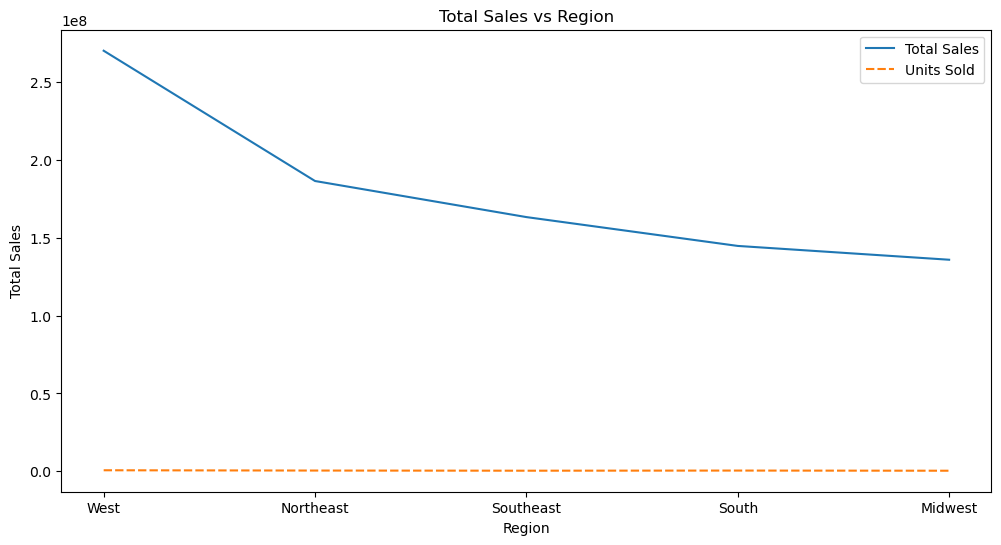

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_sales)
plt.title("Total Sales vs Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

In [37]:
# Agregando el Total Sales y Units Sold por cada Region y Estado

region_state_sales = data.groupby(['Region', 'State']).agg({'Total Sales': 'sum', 'Units Sold': 'sum'})

# Ordenamos de forma ascendente las Total Sales por Region y Estado

region_state_sales = region_state_sales.sort_values(by='Total Sales', ascending=False).head()
region_state_sales

,,Total Sales,Units Sold
Region,State,,
Northeast,New York,64229039.0,169140.0
West,California,60174133.0,163284.0
Southeast,Florida,59283714.0,133430.0
South,Texas,46359746.0,159500.0
Southeast,South Carolina,29285637.0,72610.0


In [38]:
# Agregando el Total Sales y Units Sold por cada Region , Estado y Metodo de Venta

region_state_method_sales = data.groupby(['Region', 'State', 'Sales Method']).agg({'Total Sales': 'sum', 'Units Sold': 'sum', 'Operating Profit': 'sum'})

# Ordenamos de forma ascendente las Total Sales por Region, Estado y Metodo de Venta

region_state_method_sales = region_state_method_sales.sort_values(by='Total Sales', ascending=False).head()
region_state_method_sales

,,,Total Sales,Units Sold,Operating Profit
Region,State,Sales Method,,,
West,California,Outlet,58685388.0,135082.0,18649316.19
Southeast,Florida,In-store,51805000.0,86335.0,18310750.00
South,Texas,Outlet,45216267.0,132221.0,18087500.74
Northeast,New York,Outlet,35277364.0,85667.0,12121558.89
Southeast,South Carolina,Online,29285637.0,72610.0,11324236.39


Análisis principal de los datos obtenidos:

En términos de ventas totales y ganancias operativas : el método de ventas en la tienda (Outlet) es el más efectivo y genera las mayores ventas totales y ganancias operativas.

En términos de margen operativo : las ventas online son las más efectivas, lo que indica que aunque las ventas totales y el beneficio operativo son menores que en las tiendas, la rentabilidad relativa a las ventas generadas es mayor.

A la hora de decidir qué método de venta es más eficaz, depende de lo que priorice el negocio. Si la atención se centra en maximizar los ingresos y las ganancias totales, entonces las ventas en la tienda son más efectivas. Sin embargo, si la atención se centra en la eficiencia en términos de ganancias generadas por dólar de ventas, entonces las ventas en línea son más efectivas.

#### 5. Optimización de precios: ¿Existe algún rango de precios específico que consiga mejores ventas que otros?

In [39]:
# Definir los rangos de precios
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

# Crear una nueva columna para el rango de precios
data['Price Range'] = pd.cut(data['Price per Unit'], bins)

# Agrupar por rango de precios y sumar las ventas totales
sales_by_price_range = data.groupby('Price Range')['Total Sales'].sum().reset_index()

# Ordenar los resultados para ver qué rango de precios tiene las mayores ventas
sorted_sales_by_price_range = sales_by_price_range.sort_values(by='Total Sales', ascending=False)

# Los resultados se ordenan según las ventas totales
sorted_sales_by_price_range

C:\Users\fvald\AppData\Local\Temp\ipykernel_3508\1484101955.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_price_range = data.groupby('Price Range')['Total Sales'].sum().reset_index()


,Price Range,Total Sales
4,"(40, 50]",220666307.0
5,"(50, 60]",210865002.0
6,"(60, 70]",190679285.0
3,"(30, 40]",134726187.0
7,"(70, 80]",52787579.0
8,"(80, 90]",33547420.0
2,"(20, 30]",29636023.0
9,"(90, 100]",14468685.0
1,"(10, 20]",6574478.0
11,"(110, 120]",3080000.0


Analisis principal de los datos obtenidos

1. Las ventas totales más altas se encuentran en el rango de precios de 40 a 50 ($220,666,307), lo que indica que los productos con precios dentro de este rango son muy populares o tienen una gran demanda.
2. Las siguientes ventas más altas se encuentran en los rangos de precios de 50 a 60 (210.865.002) y de 60 a 70 (190.679.285). Estas gamas también parecen ser efectivas en términos de ventas.
3. A medida que el precio aumenta más allá 70 a 52.787.579.
4. Las cifras de ventas más bajas se observan en el extremo inferior del espectro de precios.

#### 6. Optimización del Portafolio de Productos: Determinar qué productos son más rentables, segmentados por ubicación.

In [40]:
# Agrupar datos por ubicación y producto

grouped_data = data.groupby(['City', 'Product']).agg({'Operating Profit': 'sum', 'Total Sales': 'sum'}).reset_index()
grouped_data

,City,Product,Operating Profit,Total Sales
0,Albany,Men's Apparel,1354932.08,3873553.0
1,Albany,Men's Athletic Footwear,1329200.59,3829596.0
2,Albany,Men's Street Footwear,2649927.25,5773987.0
3,Albany,Women's Apparel,2343150.19,4779109.0
4,Albany,Women's Athletic Footwear,908094.68,2973011.0
...,...,...,...,...
307,Wilmington,Men's Athletic Footwear,664729.64,1884159.0
308,Wilmington,Men's Street Footwear,1244055.88,3522197.0
309,Wilmington,Women's Apparel,1016327.95,2520405.0
310,Wilmington,Women's Athletic Footwear,500967.12,1242580.0


In [41]:
# Calcular el margen de beneficio

grouped_data['Profit Margin'] = grouped_data['Operating Profit'] / grouped_data['Total Sales']
grouped_data

,City,Product,Operating Profit,Total Sales,Profit Margin
0,Albany,Men's Apparel,1354932.08,3873553.0,0.349791
1,Albany,Men's Athletic Footwear,1329200.59,3829596.0,0.347086
2,Albany,Men's Street Footwear,2649927.25,5773987.0,0.458942
3,Albany,Women's Apparel,2343150.19,4779109.0,0.490290
4,Albany,Women's Athletic Footwear,908094.68,2973011.0,0.305446
...,...,...,...,...,...
307,Wilmington,Men's Athletic Footwear,664729.64,1884159.0,0.352799
308,Wilmington,Men's Street Footwear,1244055.88,3522197.0,0.353205
309,Wilmington,Women's Apparel,1016327.95,2520405.0,0.403240
310,Wilmington,Women's Athletic Footwear,500967.12,1242580.0,0.403167


In [42]:
# Clasificación dentro de cada ubicación para encontrar los productos más rentables

grouped_data.sort_values(by=['City', 'Profit Margin'], ascending=[True, False], inplace=True)
grouped_data

,City,Product,Operating Profit,Total Sales,Profit Margin
3,Albany,Women's Apparel,2343150.19,4779109.0,0.490290
2,Albany,Men's Street Footwear,2649927.25,5773987.0,0.458942
0,Albany,Men's Apparel,1354932.08,3873553.0,0.349791
1,Albany,Men's Athletic Footwear,1329200.59,3829596.0,0.347086
4,Albany,Women's Athletic Footwear,908094.68,2973011.0,0.305446
...,...,...,...,...,...
310,Wilmington,Women's Athletic Footwear,500967.12,1242580.0,0.403167
311,Wilmington,Women's Street Footwear,605627.89,1502297.0,0.403135
308,Wilmington,Men's Street Footwear,1244055.88,3522197.0,0.353205
307,Wilmington,Men's Athletic Footwear,664729.64,1884159.0,0.352799


In [43]:
# Opcionalmente, muestra los 5 productos más rentables de cada ciudad.

top_products_by_city = grouped_data.groupby('City').head(5)

top_products_by_city

,City,Product,Operating Profit,Total Sales,Profit Margin
3,Albany,Women's Apparel,2343150.19,4779109.0,0.490290
2,Albany,Men's Street Footwear,2649927.25,5773987.0,0.458942
0,Albany,Men's Apparel,1354932.08,3873553.0,0.349791
1,Albany,Men's Athletic Footwear,1329200.59,3829596.0,0.347086
4,Albany,Women's Athletic Footwear,908094.68,2973011.0,0.305446
...,...,...,...,...,...
309,Wilmington,Women's Apparel,1016327.95,2520405.0,0.403240
310,Wilmington,Women's Athletic Footwear,500967.12,1242580.0,0.403167
311,Wilmington,Women's Street Footwear,605627.89,1502297.0,0.403135
308,Wilmington,Men's Street Footwear,1244055.88,3522197.0,0.353205


In [44]:
# Agrupar datos por producto y ciudad y sumar las ventas totales
grouped_data = data.groupby(['Product', 'City'])['Total Sales'].sum().reset_index()

# Para cada producto, encuentre la ciudad donde hay mejor y peor desempeño
best_worst_performing_cities = []

for product in grouped_data['Product'].unique():
    product_data = grouped_data[grouped_data['Product'] == product]
    best_city = product_data[product_data['Total Sales'] == product_data['Total Sales'].max()]
    worst_city = product_data[product_data['Total Sales'] == product_data['Total Sales'].min()]
    best_worst_performing_cities.extend([best_city, worst_city])

# Concatenar los resultados en un solo DataFrame
best_worst_performing_cities_df = pd.concat(best_worst_performing_cities).reset_index(drop=True)

# Mostrar los resultados
print("Best and Worst Performing Cities for Each Product:")
best_worst_performing_cities_df

Best and Worst Performing Cities for Each Product:


,Product,City,Total Sales
0,Men's Apparel,New York,6835166.0
1,Men's Apparel,Omaha,530197.0
2,Men's Athletic Footwear,New York,6301528.0
3,Men's Athletic Footwear,Omaha,942983.0
4,Men's Street Footwear,Charleston,9479502.0
5,Men's Street Footwear,Omaha,2131074.0
6,Women's Apparel,Charleston,8147789.0
7,Women's Apparel,Omaha,1202661.0
8,Women's Athletic Footwear,New York,5201048.0
9,Women's Athletic Footwear,Omaha,465677.0


Analisis principal de los datos obtenidos:

La popularidad y la rentabilidad del producto varían significativamente según la ciudad, lo que indica la necesidad de estrategias de marketing y ventas personalizadas en diferentes ubicaciones. Las tendencias contrastantes entre ciudades como Albany, Wilmington y Omaha resaltan las diversas preferencias de los consumidores, lo que subraya la importancia de un enfoque específico de la ubicación en las estrategias de ventas y marketing.

#### 7. Oportunidades de expansión del mercado: evaluar las tiendas con mejor y peor desempeño según su ubicación.

In [45]:
# Convertir el diccionario a un DataFrame, si aún no lo has hecho
df = pd.DataFrame(data)

# Agrupación de datos por ciudad y nombre de tienda
grouped_data = df.groupby(['City', 'Retailer']).agg({
    'Total Sales': 'sum',
    'Operating Profit': 'sum'
}).reset_index()

# Calcular métricas de rendimiento
grouped_data['Profit Margin'] = grouped_data['Operating Profit'] / grouped_data['Total Sales']

# Clasificación por ventas totales y margen de beneficio
grouped_data = grouped_data.sort_values(by=['City', 'Total Sales', 'Profit Margin'], ascending=[True, False, False])

# Mostrando los datos agrupados
print("Store Performance by City:")
grouped_data

Store Performance by City:


,City,Retailer,Total Sales,Operating Profit,Profit Margin
1,Albany,West Gear,20735165.0,8062399.80,0.388827
0,Albany,Kohl's,3692639.0,1367451.11,0.370318
2,Albuquerque,Kohl's,17065965.0,5783668.15,0.338901
3,Albuquerque,Sports Direct,2799051.0,954392.26,0.340970
4,Anchorage,Amazon,13365025.0,4143804.75,0.310048
...,...,...,...,...,...
103,St. Louis,West Gear,1701133.0,681457.25,0.400590
105,Wichita,Kohl's,6451914.0,2279774.62,0.353349
104,Wichita,Foot Locker,3520950.0,1230372.67,0.349443
106,Wilmington,Foot Locker,8387568.0,3077352.68,0.366895


Análisis principal de los datos obtenidos

Este análisis proporciona información valiosa sobre el desempeño de las tiendas minoristas en diferentes ciudades, destacando la importancia de la ubicación en las ventas y la rentabilidad. Los datos se pueden utilizar para identificar áreas de desempeño fuerte y débil, optimizar operaciones y elaborar estrategias para la expansión o mejora del mercado.

#### 8. Análisis de series temporales: investigue si ha habido una tendencia de ventas constante a lo largo del tiempo o alguna tendencia mensual notable.

El análisis de las tendencias de ventas a lo largo del tiempo, basado en los datos proporcionados, ofrece observaciones esclarecedoras.

Inicialmente, el análisis de series de tiempo implica agrupar datos de ventas por mes y trazar estas cifras para evaluar visualmente las tendencias. La trama resultante, diseñada para brindar claridad y estética, revela patrones en las fluctuaciones de ventas mensuales. Además, se realiza un análisis numérico para determinar la estacionalidad y las tendencias generales de ventas. Esto implica calcular las diferencias en las ventas mes a mes y establecer un umbral para identificar cambios significativos. El resultado indica la presencia de estacionalidad en las ventas, ya que las variaciones superan el umbral predefinido.

In [46]:
# Importamos el modulo datetime que nos permite trabajar con fechas

import datetime

In [47]:
# creamos 3 nuevas columnas en el DataFrame inicial, para extraer el año, el mes y dia

data['Year'] = pd.DatetimeIndex(data['Invoice Date']).year
data['Month'] = pd.DatetimeIndex(data['Invoice Date']).month
data['Day'] = pd.DatetimeIndex(data['Invoice Date']).day

In [48]:
# Asi pasamos ahora a un DataFrame de 16 variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Price Range       9648 non-null   category      
 14  Year              9648 n

In [49]:
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Price Range,Year,Month,Day
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,"(40, 50]",2020,1,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,"(40, 50]",2020,1,2
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,"(30, 40]",2020,1,3
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,"(40, 50]",2020,1,4
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,"(50, 60]",2020,1,5


In [50]:
# Visualizamos el numero de registros por año que tenemos

data['Year'].value_counts()


Year
2021    8346
2020    1302
Name: count, dtype: int64

In [51]:
# Agregando el Total Sales y Units Sold por cada año

year_sales = data.groupby('Year').agg({'Total Sales': 'sum', 'Units Sold': 'sum'})
print(year_sales)

      Total Sales  Units Sold
Year                         
2020  182080675.0    462349.0
2021  717821450.0   2016512.0


In [52]:
# Agregando el Total Sales y Units Sold por cada año y mes

year_month_sales = data.groupby(['Year', 'Month']).agg({'Total Sales': 'sum', 'Units Sold': 'sum'})
year_month_sales

Total Sales  Units Sold
Year Month                         
2020 1       16253746.0     48333.0
     2       14997988.0     37846.0
     3       17660577.0     46972.0
     4       24607006.0     54709.0
     5       16918014.0     35705.0
     6        8829819.0     16269.0
     7       17146013.0     38219.0
     8       19877980.0     62307.0
     9       18304436.0     46125.0
     10      10836269.0     30167.0
     11       8622300.0     25152.0
     12       8026527.0     20545.0
2021 1       55225396.0    179299.0
     2       46102165.0    156113.0
     3       39148532.0    143988.0
     4       47732964.0    161717.0
     5       63589681.0    178900.0
     6       65917553.0    164745.0
     7       78334681.0    180481.0
     8       72288221.0    195414.0
     9       59357023.0    182425.0
     10      53074764.0    152834.0
     11      59235040.0    149350.0
     12      77815430.0    171246.0

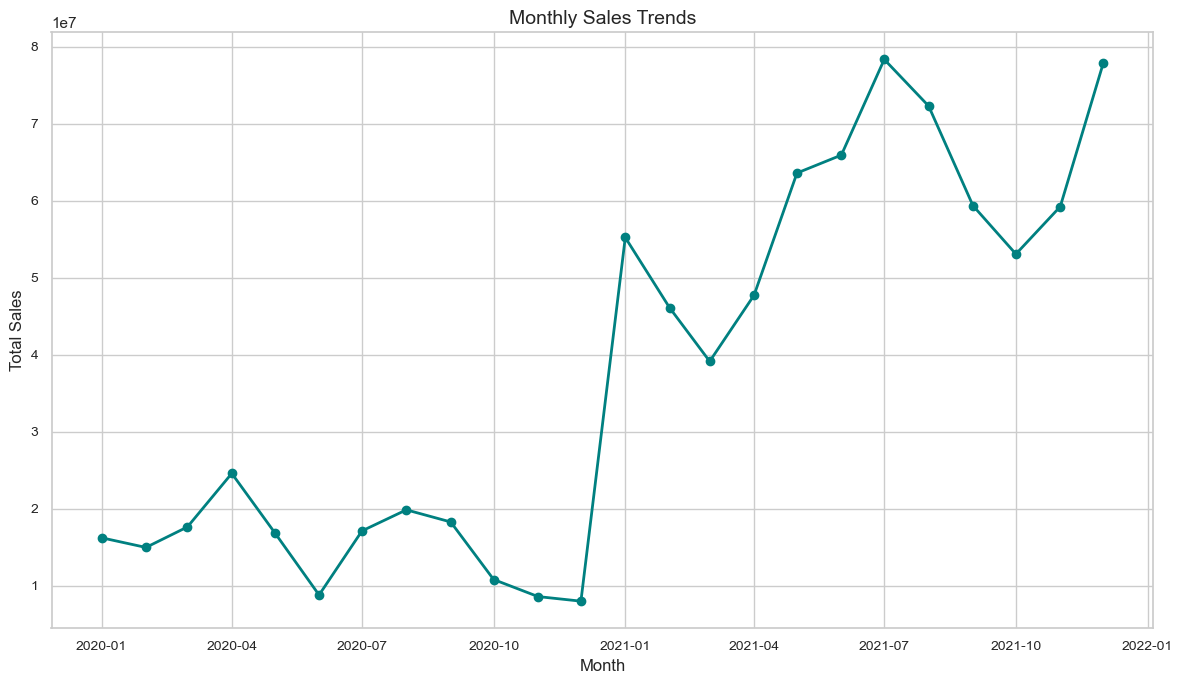

In [53]:
# Group by month and calculate total sales for each month
monthly_sales = data.groupby(data['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

# Convert the index (which is of type 'Period') to DateTime objects
monthly_sales.index = monthly_sales.index.to_timestamp()

# Setting the style for a more aesthetic plot
sns.set(style="whitegrid")

# Plotting the sales trends over time
plt.figure(figsize=(12, 7))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='teal', linestyle='-', linewidth=2)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Monthly Sales Trends', fontsize=14)
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

In [54]:
# Calculate the difference between consecutive months for trend analysis
diff = monthly_sales.diff()

# Define the threshold for significant change (seasonality)
seasonality_threshold = 10000

# Check for seasonality
if (diff.abs() > seasonality_threshold).any():
    print("These sales follow a seasonality.")
else:
    print("These sales do not follow a seasonality.")

# Check for trend
if (diff > 0).all():
    print("There is an increasing trend in sales.")
elif (diff < 0).all():
    print("There is a decreasing trend in sales.")
else:
    print("There is no consistent trend in sales.")

These sales follow a seasonality.
There is no consistent trend in sales.


Resumen:

Los datos de ventas mensuales de enero de 2020 a enero de 2022 muestran una variabilidad significativa con picos notables alrededor de abril de 2021 y aumentos constantes en diciembre y abril de cada año, lo que podría correlacionarse con temporadas navideñas y promociones de ventas. Los datos muestran una tendencia general al alza en las ventas durante el período de dos años, a pesar de algunas caídas notables, particularmente en julio de 2020 y octubre de 2021.

Perspectivas:

Los patrones estacionales observados, con picos y caídas en las ventas, resaltan la importancia de comprender el comportamiento de compra de los clientes y el impacto de la estacionalidad en las ventas. Al aprovechar estos conocimientos, las empresas pueden alinear sus esfuerzos de marketing, gestión de inventario y asignación de recursos con períodos anticipados de alta demanda, asegurando que se maximicen las oportunidades durante las temporadas altas. Este enfoque estratégico puede conducir a una mejor preparación para los aumentos repentinos de la demanda, una mayor satisfacción del cliente y un mejor desempeño comercial en general.

#### 9. Análisis predictivo de ventas: desarrolle un pronóstico de ventas mensuales.

Utilizando el modelo ARIMA, pronosticé las ventas mensuales del próximo año analizando las tendencias históricas y la estacionalidad. Este método ofrece más que simples proyecciones futuras; es un activo estratégico para las empresas. Guía la asignación eficiente de recursos, anticipa las fluctuaciones del mercado y garantiza la adaptabilidad en un mercado dinámico.

Se ajusta un modelo ARIMA con parámetros (2,1,2) a los datos de ventas mensuales para pronosticar tendencias futuras. El modelo predice con éxito las ventas de los próximos 12 meses, combinando datos históricos con valores pronosticados. La visualización resultante, que incluye tanto las ventas reales como las previstas, proporciona una descripción clara del rendimiento de ventas esperado para el próximo año, lo que ayuda en la planificación estratégica y la asignación de recursos.

In [55]:
# Fit the ARIMA model to the data
model = ARIMA(monthly_sales, order=(2,1,2))  # Order: (p, d, q)
model_fit = model.fit()

# Make predictions for the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

#Visualize the actual sales data and the forecasted values for the next months.
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label='Actual Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, marker='o', label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

NameError: name 'ARIMA' is not defined

## 5.- PRUEBA DE HIPOTESIS Y CONOCIMIENTOS

- Pruebas estadísticas utilizadas : describa las pruebas estadísticas específicas realizadas, incluidas las hipótesis nulas y alternativas, las estadísticas de prueba y los grados de libertad.

- Hallazgos e ideas : Explique los resultados de las pruebas de hipótesis y sus implicaciones. Discuta cualquier relación o diferencia significativa y su relevancia para los objetivos del proyecto.

## 6.- INFORME FINAL Y PRESENTACION

- Hallazgos clave : resuma los hallazgos más críticos de manera concisa e impactante. Utilice imágenes y estadísticas clave para resaltar estos hallazgos. este trabajo EDA, tiene como objetivo a nivel personal, el aprendizaje con herramientas de programación del análisis de datos. Partiendo de un archivo de tamaño pequeño se analiza una colección de ventas de la marca Adidas en un área geográfica de USA, en un periodo de años 2020-2021 determinando las ciudades con mayores ventas y los retailer mejor posicionados.

- Limitaciones del análisis : discuta las posibles limitaciones en los datos, la metodología o el análisis. Aborde cualquier fuente de sesgo o incertidumbre. El análisis basado en un pequeño archivo de periodo breve, limita la trayectoria anterior de otros años, al tener localización geográfica en USA, no permite analizar situación con otros países o incluso a nivel mundial. El estudio a nivel geolocalización no permite hacer otros estudios referenciales sobre situación de cada retail respecto a otros.

- Recomendaciones y próximos pasos : ofrezca recomendaciones prácticas basadas en sus conocimientos y proponga qué acciones o análisis deben seguir esta EDA. A recomendar un estudio más amplio con situación geolocal, con los datos que se tienen, la ampliación del estudio a nivel de ventas de otras ciudades de otros paises, el estudio comparativo con otras marcas, pudieran analizar situación por ciudades, paises entre la competencia.

## 7.- REFERENCIAS Y FUENTES DE DATOS

- @stellabigail - https://data.world/stellabigail/adidas-us-sales-datasets
- Prayag Padwal - https://prayagpadwal.github.io/

### Authors

- fvaldepe - https://github.com/fvaldepe
- fvaldepe - https://administracionvirtualvif.wordpress.com/quienes-somos/
- fvaldepe - https://www.linkedin.com/in/fvaldepe/

### Other Contributors

### Change Log

| Date (YYYY-MM-DD) | Version | Changed By                                               | Change Description |
| ----------------- | ------- | -------------------------------------------------------- | ------------------ |
| 2024-04-30        | 0.1     | Fernando Valdepeñas   Created initial version of the lab |                    |
|                   |         |                                                          |                    |

## 8.- ARCHIVOS DEL PROYECTO

- Archivos de código EDA : enumera y organiza los archivos de código, scripts o cuadernos utilizados para las diferentes etapas del análisis. Incluya comentarios y explicaciones en el código. Este Notebook ha sido editado con jupyter Version: 7.0.6 en un entorno de desarrollo con Anaconda.Navigator. Los comentarios del cuaderno han sido traducido de la fuente original de proyecto y en algunos casos se han introducido nuevos propios del autor fvaldepe.

- Fuente de datos: para este proyecto, utilizamos el "Conjunto de datos de ventas de Adidas" de data.world ( https://data.world/stellabigail/adidas-us-sales-datasets ), en formato XLSX
  
-
Tamaño de datos: el conjunto se compone de 9.648 registros con 13 variables, con un tamaño de 673 KB

- Presentaciones o Informes : incluya las presentaciones, informes o documentos finales creados para comunicar y compartir los resultados de su proyecto EDA.

## 9. PANEL DE POWER BI

Dada las poderosas capacidades de Business Intelligence de Power BI, se elabora un panel intereactivo.

<img src="ADIDAS_Sales_DB.jpg">